# Kelompok V
Anggota Kelompok V : 
1. Putu Agus Arya Suta (2208541012)
2. I Dewa Ayu Pradnya Pratiwi T. (2208541013)
3. Ni Putu Dina Agustina (2208541043)

Pada project kali ini, kami berkesempatan untuk mengeksplorasi data terkait hujan. 

# Menampilkan Data Hujan

In [1]:
#pada bagian pertama eksplorasi data, terlebih dahulu kita akan menampilkan data hujan tersebut
#pada bagian ini sebelum kita menampilkan data yang akan kita panggil, kita akan mengimport pandas yang bertujuan untuk memanngil data pandas
#serta kita juga akan mengimpor warnings
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#pd.options.display.max_rows ini untuk bertujuan untuk mengatur berapa banyak maksimal baris yang ingin ditampilkan pada notebook
#disini kami mengatur tampilan maksimal untuk baris sebanyak 100 saja
pd.set_option("display.max_columns", 100)

In [2]:
#pada bagian ini kita akan menampilkan data pada github account @imdwipayana
#diinisialisasikan data csv pada github sebagai data_hujan dengan mencantumkan link github data hujan pada kode
data_hujan = pd.read_csv("https://raw.githubusercontent.com/imdwipayana/DATA/main/Dataset%20Final%20Project%202023/Hujan/hujan.csv") 
#selanjutnya akan dicetak dan dimunculkan data data_hujan yang sebelumnya telah diinisialisasikan
data_hujan

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


#Penjelasan Nama Kolom
1. Date : Tanggal
2. Location : Lokasi/daerah
3. MinTemp : Suhu terkecil/terendah (temperatur minimum)
4. MaxTemp : Suhu tertinggi (temperatur maksimum)
5. Rainfall : Curah hujan
6. Evaporation : Evaporasi
7. Sunshine : Cahaya matahari
8. WindGustDir : Arah hembusan angin
9. WindGustSpeed : Kecepatan hembusan angin
10. WindDir9am : Arah angin pukul 09.00 pagi
11. WindDir3pm : Arah angin pukul 03.00 sore
12. WindSpeed9am : Kecepatan angin pukul 09.00 pagi
13. WindSpeed3pm : Kecepatan angin pukul 03.00 sore
14. Humidity9am : Kelembapan pukul 09.00 pagi
15. Humidity3pm : Kelembapan pukul 03.00 sore
16. Pressure9am : Tekanan pukul 09.00 pagi
17. Pressure3pm : Tekanan pukul 03.00 sore
18. Cloud9am : Awan pukul 09.00 pagi 
19. Cloud3pm : Awan pukul 03.00 sore
20. Temp9am  : Temperatur/suhu pukul 09.00 pagi
21. Temp3pm  : Temperatur/suhu pukul 03.00 sore
22. RainToday : Prediksi hujan hari ini
23. RainTomorrow : Prediksi hujan hari esok

In [3]:
#pada bagian ini akan ditampilkan tipe-tipe dari setiap data berdasarkan kolom yang ada pada data_hujan
#hal ini bertujuan untuk kita mengeskplor dan menganalisis data yang diberikan apakah data tersebut berupa objek ataupun numerik
data_hujan.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [4]:
#ditampilkan informasi terkait data hujan
data_hujan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Memeriksa Data Kosong

In [5]:
#untuk memudahkan menganalisis data, kita mencoba untuk memeriksa terlebih dahulu apakah terdapat data yang kosong pada masing-masing kolom.
#adapun kode untuk mengecek dan menjumlahkan seberapa banyak data yang kosong, yaitu menggunakan isnull dan sum
data_hujan.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# Mengatasi Data Kosong

In [6]:
#setelah sebelumnya kita mengetahui jumlah data yang kosong pada masing-masing bagian, selanjutnya kita akan mengeleminasi beberapa bagian pada data_hujan
#alasan kami mengeliminasi beberapa bagian tersebut karena pada bagian tersebut terdapat data kosong sebanyak lebih dari 50% dari total keseluruhan data
#dengan demikian kami memutuskan untuk mengeleminasi bagian tersebut dengan drop
#adapun bagian yang akan di drop yakni seperti evaporation, sunshine, cloud9am, dan cloud3pm
data_hujan = data_hujan.drop(['Date','Evaporation', 'Sunshine','Cloud9am','Cloud3pm'], axis=1)
#selanjutnya akan dicetak kembali data_hujan terbaru yang telah mengalami pembaharuan
data_hujan

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [7]:
#selanjutnya kita kembali mengecek data kosong yang masih terdapat pada data
data_hujan.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
#selanjutnya kita melihat berapa data yang kita punya
data_hujan.shape

(145460, 18)

In [9]:
#selanjutnya dari data tersebut masih terdapat data yang kosong, maka kembali kita akan mengeliminasi data menggunakan dropna yaitu mengeliminasi baris yang kosong
data_hujan = data_hujan.dropna()
#akan ditampilkan kembali data hujan yang kita miliki setelah menghilangkan data yang kosong
data_hujan

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


In [10]:
#akan dicek kembali ukuran dari data yang kita miliki
data_hujan.shape
#pada hasil terjadi penurunan jumlah data sebanyak kurang lebih 21% dari jumlah data yang ada

(112925, 18)

In [11]:
#memastikan kembali apakah data yang kita memiliki masih mengandung data kosong, maka kita cek kembali menggunakan sintaks isnull dan sum
data_hujan.isnull().sum()
#didapat bahwa data_hujan sudah tidak mengandung data yang kosong sehingga akan memudahkan untuk analisis dan eksplorasi

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [12]:
#akan dicek kembali mengenai tipe data dari masing-masing bagian data_hujan terbaru
data_hujan.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

# Data Train dan Data Test

In [13]:
#akan dimulai untuk eksplorasi data
#pada bagian ini kita ingin mengetahui sebaran data pada bagian RainTomorrow menggunakan sintaks unique
data_hujan['RainTomorrow'].unique()
#didapat hal yang unik dari data tersebut hanya terdiri dari data array No dan Yes dengan jenisnya yakni objek

array(['No', 'Yes'], dtype=object)

In [14]:
#karena data pada RainTomorrow berjenis objek, maka data tersebut akan diubah ke data numerik, untuk No = 0 dan Yes = 1
data_hujan['RainTomorrow'] = data_hujan['RainTomorrow'].map({'No':0,'Yes':1})

In [15]:
#kemudian akan dilakukan proses one hot encode terhadap variabel asli yang ada pada data hujan
data_hujan = pd.get_dummies(data_hujan)

In [16]:
#pada bagian ini diinisialisasikan variabel x dan y dengan pendefiniiannya sebagai berikut
X = data_hujan.drop(['RainTomorrow'],axis=1)
y = data_hujan['RainTomorrow']

In [17]:
#pada bagian ini akan dilakukan training dan testing data
#sebelumnya kita akan menggunakan sklearn yang akan membagi data yang akan di train dan test
#serta secara otomatis mengacak data yang akan di train dan test menggunakan split agar data yang diuji mewakili data secara keseluruhan
from sklearn.model_selection import train_test_split
#kemudian didefinisikan variabel x dan y yang masing-masing akan ditrain serta test dimana besar data yang ditest yakni 20% serta 80% untuk train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [18]:
#berikut akan ditampikan untuk variabel x yang ditrain
X_train 

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,...,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
119251,6.6,20.7,2.2,31.0,2.0,19.0,80.0,45.0,1020.5,1019.1,14.8,19.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
79199,8.7,11.3,5.2,63.0,13.0,26.0,99.0,100.0,1007.7,1004.8,8.9,9.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
33836,19.3,22.3,1.0,54.0,39.0,33.0,74.0,68.0,1020.1,1019.2,20.8,21.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
8201,22.0,31.5,0.4,37.0,17.0,6.0,65.0,40.0,1013.4,1011.3,23.6,31.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6759,14.1,27.6,0.0,33.0,13.0,17.0,46.0,31.0,1007.3,1006.7,20.9,26.3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79852,7.7,15.5,2.4,24.0,6.0,11.0,83.0,52.0,1027.8,1026.6,10.7,14.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
59212,9.7,25.9,0.0,41.0,17.0,15.0,38.0,24.0,1018.3,1014.2,16.8,24.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
60375,7.3,24.2,0.0,31.0,11.0,4.0,68.0,33.0,1023.1,1018.3,15.0,23.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
140922,22.7,34.3,0.0,37.0,6.0,22.0,66.0,37.

In [19]:
#berikut akan ditampikan untuk variabel x yang ditest
X_test

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,...,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
93176,21.4,27.1,2.2,57.0,20.0,43.0,84.0,74.0,1016.4,1014.4,25.8,25.6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
33284,13.0,24.1,0.0,39.0,20.0,20.0,34.0,32.0,1014.6,1013.0,19.1,21.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
42150,9.0,21.0,0.0,48.0,31.0,9.0,49.0,21.0,1018.5,1013.8,14.4,21.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
128862,11.9,20.7,0.6,30.0,7.0,15.0,87.0,75.0,1018.0,1014.6,15.9,19.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
58934,22.4,40.0,0.0,59.0,13.0,31.0,41.0,17.0,1006.7,1003.5,29.1,38.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35044,14.5,17.0,14.8,80.0,22.0,50.0,96.0,60.0,1005.5,1009.7,14.9,15.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
72323,-1.2,13.8,0.0,28.0,7.0,17.0,91.0,38.0,1033.1,1031.6,2.5,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
62669,12.3,21.9,0.0,69.0,19.0,37.0,74.0,44.0,1020.5,1018.9,16.8,21.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
91261,17.5,23.7,1.6,59.0,44.0,43.0,

In [20]:
#berikut akan ditampikan untuk variabel y yang dilatih
y_train

119251    0
79199     1
33836     0
8201      1
6759      0
         ..
79852     0
59212     0
60375     0
140922    0
100549    1
Name: RainTomorrow, Length: 90340, dtype: int64

In [21]:
#Data hujan yang kami miliki berukuran terlalu besar untuk SVM sehingga lebih  baik menggunakan logistic regression

# Logistic Regression

In [22]:
#dari data yang dimiliki, dengan menggunakan sklearn akan ditentukan jenis model yang akan digunakan untuk analisis data
#model yang kami pilih dan kami rasa sesuai dengan data hujan yakni regresi logistik
from sklearn.linear_model import LogisticRegression

In [23]:
#didefinisikan model logisticRegression sebagai model_lr
model_lr = LogisticRegression()

In [24]:
#bagian ini akan dilakukan pemodelan untuk data tranining yakni x train dan y train
model_lr.fit(X_train,y_train)

LogisticRegression()

In [25]:
#bagian ini akan dilakukan pemodelan untuk data testing yakni x test dan y test
model_lr.score(X_test,y_test)

0.8448527783927385

# Korelasi

In [26]:
#kembali dicetak data hujan yang telah dimiliki sebelumnya
data_hujan

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,Location_Adelaide,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,...,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1

In [27]:
#selanjutnya didefinisikan data_hujan1 dengan data terambil beberapa bagian dari data hujan menggunakan indeks
data_hujan1 = data_hujan[['MaxTemp','MinTemp','RainToday_No', 'RainToday_Yes']]

In [28]:
#akan dicetak data_hujan1 yang sebelumnya telah diinisialisasikan
data_hujan1
#pada hasil terlihat data terbaru pula ukuran dari data_hujan1

,MaxTemp,MinTemp,RainToday_No,RainToday_Yes
0,22.9,13.4,1,0
1,25.1,7.4,1,0
2,25.7,12.9,1,0
3,28.0,9.2,1,0
4,32.3,17.5,1,0
...,...,...,...,...
145454,21.8,3.5,1,0
145455,23.4,2.8,1,0
145456,25.3,3.6,1,0
145457,26.9,5.4,1,0


In [29]:
#selanjutnya akan ditentukan mengenai korelasi antar tiap bagian pada data hujan 1
data_hujan1.corr()
#pada hasil terlihat bahwa daerah hasil korelasi yakni berada pada -1 ≤ x ≤ 1
#daerah yang menunjukkan hasil menuju atau sama dengan 1 menandakan semakin kuat korelasi positif antar bagian tersebut
#sebaliknya dengan kontradiksi apabila hasil menunjukkan nilai menuju atau sama dengan -1 menandakan semakin kuat korelasi negatifnya
#dan jika apabila hasil berada pada 0 ini menunjukkan bahwa tiap bagian tersebut tidak memiliki korelasi

,MaxTemp,MinTemp,RainToday_No,RainToday_Yes
MaxTemp,1.000000,0.728942,0.242983,-0.242983
MinTemp,0.728942,1.000000,-0.044605,0.044605
RainToday_No,0.242983,-0.044605,1.000000,-1.000000
RainToday_Yes,-0.242983,0.044605,-1.000000,1.000000


<AxesSubplot:>

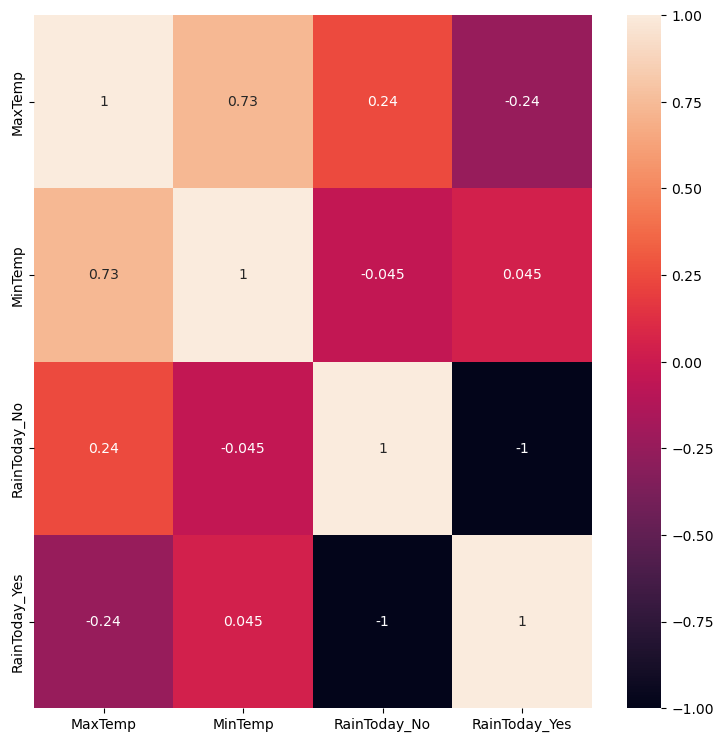

In [30]:
#karena pada bagian sebelumnya kita telah membuat heatmap dari data_hujan1 namun tidak terdapat angka yang menyatakan besaran dari data tersebut
#untuk memudahkan membaca data, kita akan memasukkan angka pada tiap-tiap warna korelasi data_hujan1
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(data_hujan1.corr(),ax=ax,annot=True)
#pada hasil, setelah ditunjukkan korelasinya faktor yang cukup memengaruhi rain today dan rain tomorrow yakni MaxTemp sebesar 0,24
#walaupun terdapat hasil korelasi sebesar 1 dan 0,73 namun hubungan yang akan kita cari yakni hanya rain today dan rain tomorrow saja
#sehingga kita perlu mengamati hasil korelasi pada bagian rain today dan rain tomorrow saja

In [31]:
#selanjutnya dengan cara yang sama kita mendefinisikan data_hujan2 dengan bagian lainnya pada data hujan yang akan kembali akan ditunjukkan korelasinya dengan rain today dan rain tomorrow
data_hujan2 = data_hujan[['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm','RainToday_No', 'RainToday_Yes']]
data_hujan2

,WindGustSpeed,WindSpeed9am,WindSpeed3pm,RainToday_No,RainToday_Yes
0,44.0,20.0,24.0,1,0
1,44.0,4.0,22.0,1,0
2,46.0,19.0,26.0,1,0
3,24.0,11.0,9.0,1,0
4,41.0,7.0,20.0,1,0
...,...,...,...,...,...
145454,31.0,15.0,13.0,1,0
145455,31.0,13.0,11.0,1,0
145456,22.0,13.0,9.0,1,0
145457,37.0,9.0,9.0,1,0


In [32]:
#akan ditunjukkan korelasi dari data_hujan 2
data_hujan2.corr()

,WindGustSpeed,WindSpeed9am,WindSpeed3pm,RainToday_No,RainToday_Yes
WindGustSpeed,1.000000,0.589735,0.679223,-0.154943,0.154943
WindSpeed9am,0.589735,1.000000,0.499372,-0.099773,0.099773
WindSpeed3pm,0.679223,0.499372,1.000000,-0.087702,0.087702
RainToday_No,-0.154943,-0.099773,-0.087702,1.000000,-1.000000
RainToday_Yes,0.154943,0.099773,0.087702,-1.000000,1.000000


<AxesSubplot:>

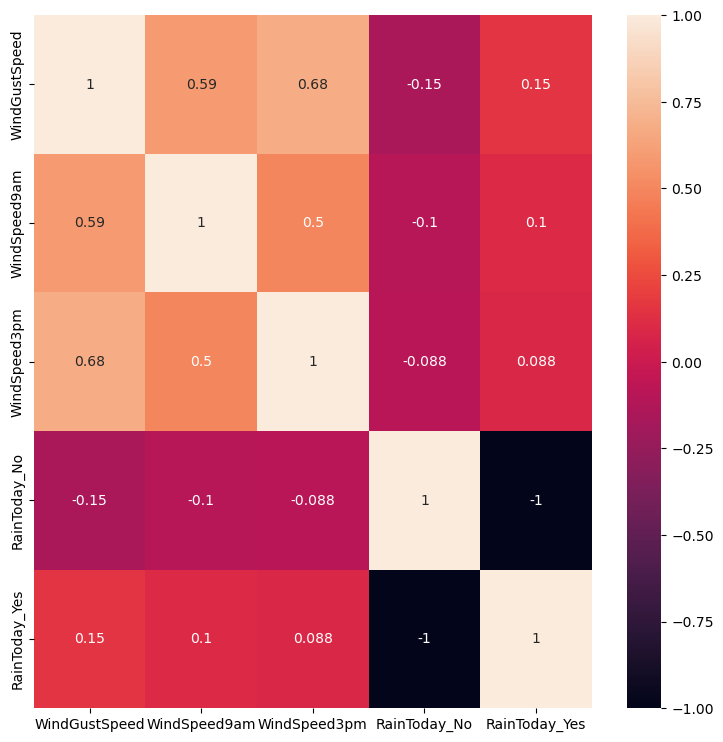

In [33]:
#karena pada bagian sebelumnya kita telah membuat heatmap dari data_hujan2 namun tidak terdapat angka yang menyatakan besaran dari data tersebut
#untuk memudahkan membaca data, kita akan memasukkan angka pada tiap-tiap warna korelasi data_hujan2
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(data_hujan2.corr(),ax=ax,annot=True)
#pada hasil, setelah ditunjukkan korelasinya faktor yang cukup memengaruhi rain today dan rain tomorrow yakni WindGustSpeed (Laju Angin) sebesar 0,15

In [34]:
#selanjutnya dengan cara yang sama kita mendefinisikan data_hujan3 dengan bagian lainnya pada data hujan yang akan kembali akan ditunjukkan korelasinya dengan rain today dan rain tomorrow
data_hujan3 = data_hujan[['Humidity9am', 'Humidity3pm', 'RainToday_No', 'RainToday_Yes']]
#akan dicetak data terkait data_hujan3
data_hujan3

,Humidity9am,Humidity3pm,RainToday_No,RainToday_Yes
0,71.0,22.0,1,0
1,44.0,25.0,1,0
2,38.0,30.0,1,0
3,45.0,16.0,1,0
4,82.0,33.0,1,0
...,...,...,...,...
145454,59.0,27.0,1,0
145455,51.0,24.0,1,0
145456,56.0,21.0,1,0
145457,53.0,24.0,1,0


In [35]:
#akan ditampilkan korelasi dari masing-masing bagian pada data_hujan3
data_hujan3.corr()

,Humidity9am,Humidity3pm,RainToday_No,RainToday_Yes
Humidity9am,1.000000,0.684373,-0.378306,0.378306
Humidity3pm,0.684373,1.000000,-0.386619,0.386619
RainToday_No,-0.378306,-0.386619,1.000000,-1.000000
RainToday_Yes,0.378306,0.386619,-1.000000,1.000000


<AxesSubplot:>

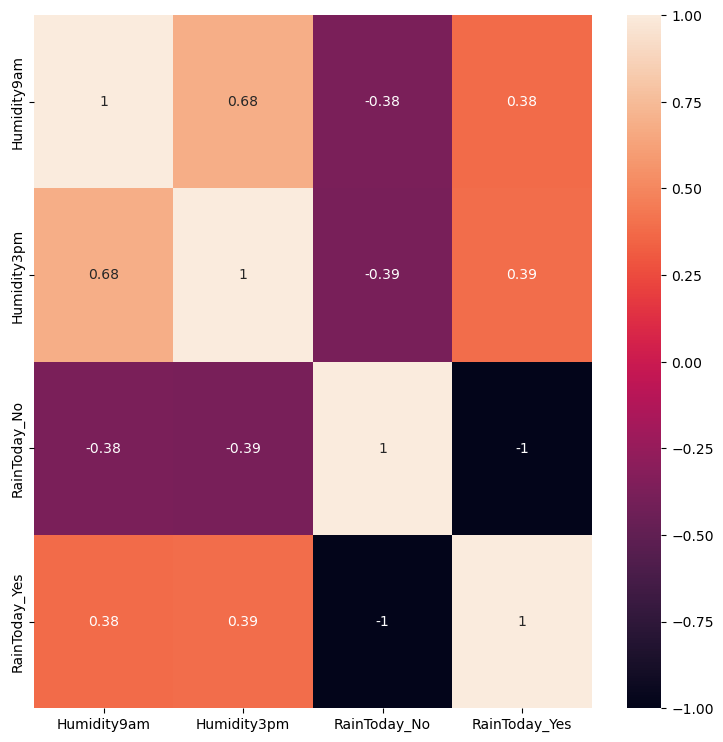

In [36]:
#untuk memudahkan membaca data, kita akan memasukkan angka pada tiap-tiap warna korelasi data_hujan3 dengan menggunakan grafik heatmap
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(data_hujan3.corr(),ax=ax,annot=True)
#pada hasil didapat humidity3pm dan humidity9am memiliki korelasi tinggi dengan rain today dan rain tomorrow masing-masing yakni sebesar 0,39 dan 0,38

In [37]:
#selanjutnya dengan cara yang sama kita mendefinisikan data_hujan4 dengan bagian lainnya pada data hujan yang akan kembali akan ditunjukkan korelasinya dengan rain today dan rain tomorrow
#dengan menggunakan indeks diinput mengenai tekanan pada pukul 9 pagi dan pukul 3 sore serta rain today dan rain tomorrow
data_hujan4 = data_hujan[['Pressure9am', 'Pressure3pm', 'RainToday_No', 'RainToday_Yes']]
#akan dicetak data mengenai data_hujan4
data_hujan4

,Pressure9am,Pressure3pm,RainToday_No,RainToday_Yes
0,1007.7,1007.1,1,0
1,1010.6,1007.8,1,0
2,1007.6,1008.7,1,0
3,1017.6,1012.8,1,0
4,1010.8,1006.0,1,0
...,...,...,...,...
145454,1024.7,1021.2,1,0
145455,1024.6,1020.3,1,0
145456,1023.5,1019.1,1,0
145457,1021.0,1016.8,1,0


<AxesSubplot:>

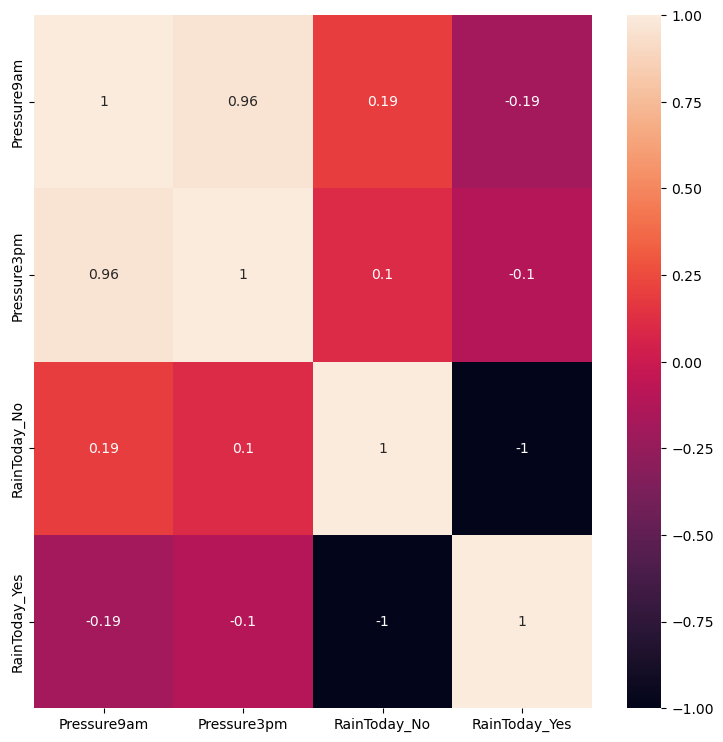

In [38]:
#selanjutnya kita akan membuat grafik heatmap serta akan ditampilkan pula korelasi antar bagian pada data_hujan4
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(data_hujan4.corr(),ax=ax,annot=True)
#pada hasil didapat bahwa yang lebih memiliki korelasi dengan rain today dan rain tomorrow yakni pressure9am sebesar 0,19

In [39]:
#kembali diinisialisasikan data_hujan5 dengan data berasal dari data hujan
#menggunakan indeks diinput bagian kolom mengenai temperatur pada pukul 9 pagi dan 3 sore serta dilengkapi dengan data rain today dan rain tomorrow 
data_hujan5 = data_hujan[['Temp9am', 'Temp3pm', 'RainToday_No', 'RainToday_Yes']]
#akan dicetak terkait data_hujan5 yang telah diinisialisasikan sebelumnya
data_hujan5

,Temp9am,Temp3pm,RainToday_No,RainToday_Yes
0,16.9,21.8,1,0
1,17.2,24.3,1,0
2,21.0,23.2,1,0
3,18.1,26.5,1,0
4,17.8,29.7,1,0
...,...,...,...,...
145454,9.4,20.9,1,0
145455,10.1,22.4,1,0
145456,10.9,24.5,1,0
145457,12.5,26.1,1,0


<AxesSubplot:>

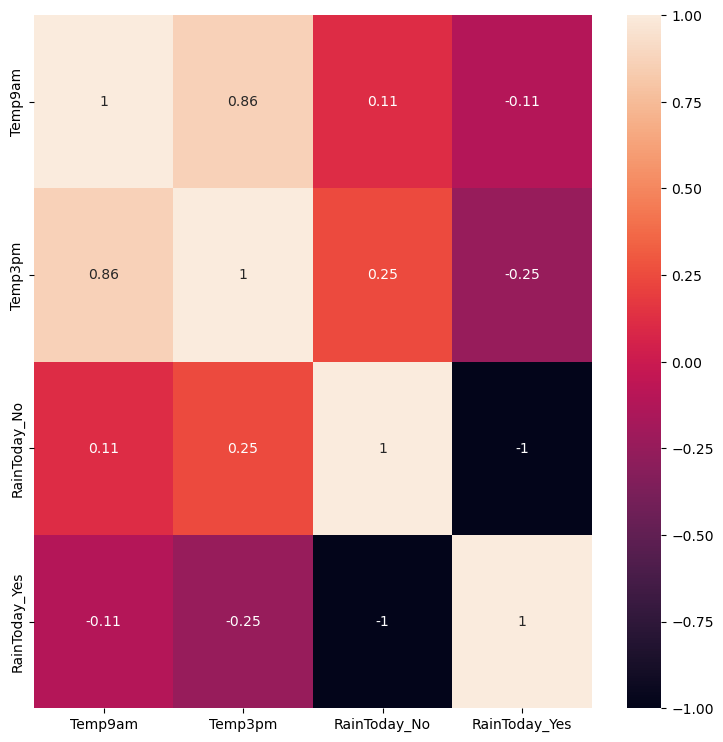

In [40]:
#selanjutnya menggunakan matplotlib, akan dibuat grafik heatmap serta akan ditampilkan pula korelasi antar bagian pada data_hujan5
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(data_hujan5.corr(),ax=ax,annot=True)
#pada data didapat bahwa temp3pm memiliki korelasi yang cukup dengan rain today dan rain tomorrow yakni sebesar 0,25

In [41]:
#kembali diinisialisasikan data_hujan6 dengan data berasal dari data hujan
#menggunakan indeks diinput bagian kolom mengenai maksimal temperatur dan temperatur 3 sore serta dilengkapi dengan data rain today dan rain tomorrow 
data_hujan6 = data_hujan[['MaxTemp', 'Temp3pm', 'RainToday_No', 'RainToday_Yes']]
#akan dicetak terkait data_hujan6 yang telah diinisialisasikan sebelumnya
data_hujan6

,MaxTemp,Temp3pm,RainToday_No,RainToday_Yes
0,22.9,21.8,1,0
1,25.1,24.3,1,0
2,25.7,23.2,1,0
3,28.0,26.5,1,0
4,32.3,29.7,1,0
...,...,...,...,...
145454,21.8,20.9,1,0
145455,23.4,22.4,1,0
145456,25.3,24.5,1,0
145457,26.9,26.1,1,0


In [42]:
#akan dicetak korelasi dari data hujan 6 dengan menggunakan sintaks sebagai berikut. 
data_hujan6.corr()

,MaxTemp,Temp3pm,RainToday_No,RainToday_Yes
MaxTemp,1.000000,0.984357,0.242983,-0.242983
Temp3pm,0.984357,1.000000,0.248650,-0.248650
RainToday_No,0.242983,0.248650,1.000000,-1.000000
RainToday_Yes,-0.242983,-0.248650,-1.000000,1.000000


In [43]:
#diinisialisasikan data_hujan7 menggunakan indeks dengan beberapa variabel data yang berasal dari data hujan
data_hujan7 = data_hujan[['MaxTemp', 'Temp3pm', 'Humidity9am', 'Humidity3pm' , 'RainToday_No', 'RainToday_Yes']]
#akan dicetak terkait data_hujan7 yang telah diinisialisasikan sebelumnya
data_hujan7

,MaxTemp,Temp3pm,Humidity9am,Humidity3pm,RainToday_No,RainToday_Yes
0,22.9,21.8,71.0,22.0,1,0
1,25.1,24.3,44.0,25.0,1,0
2,25.7,23.2,38.0,30.0,1,0
3,28.0,26.5,45.0,16.0,1,0
4,32.3,29.7,82.0,33.0,1,0
...,...,...,...,...,...,...
145454,21.8,20.9,59.0,27.0,1,0
145455,23.4,22.4,51.0,24.0,1,0
145456,25.3,24.5,56.0,21.0,1,0
145457,26.9,26.1,53.0,24.0,1,0


In [44]:
#akan dicetak mengenai korelasi antar variabel pada data_hujan7
data_hujan7.corr()

,MaxTemp,Temp3pm,Humidity9am,Humidity3pm,RainToday_No,RainToday_Yes
MaxTemp,1.000000,0.984357,-0.517188,-0.497679,0.242983,-0.242983
Temp3pm,0.984357,1.000000,-0.510028,-0.547120,0.248650,-0.248650
Humidity9am,-0.517188,-0.510028,1.000000,0.684373,-0.378306,0.378306
Humidity3pm,-0.497679,-0.547120,0.684373,1.000000,-0.386619,0.386619
RainToday_No,0.242983,0.248650,-0.378306,-0.386619,1.000000,-1.000000
RainToday_Yes,-0.242983,-0.248650,0.378306,0.386619,-1.000000,1.000000


sehingga berdasarkan analisis data menggunakan korelasi dan regresi logistik didapat bahwa humidity9am, humidity3pm, maxtemp, dan temp3pm menjadi faktor yang utama terjadinya rain today

serta menjadi faktor yang cukup kuat untuk menciptakan interpretasi awal terkait rain tomorrow

# Menghitung korelasi antara kolom "Max Temperature" dan "Kecepatan Angin"

In [45]:
#sebelumnya kita telah menentukan korelasi tiap variabel pada data hujan
#pada bagian ini kita akan menghitung korelasi beberapa variabel yakni mengenai maksimal temperatur dan kecepatan angin
import pandas as pd #mengimpor library pandas
import seaborn as sns #mengimpor library seaborn untuk grafik statistik
import matplotlib.pyplot as plt #mengimpor matplotlib untuk menciptakan visual data yang lebih menarik

In [46]:
# Pada bagian ini, kita akan menghitung korelasi antara kolom "Max Temperature" dan "Kecepatan Angin"
#didefinisikan correlation dengan indeks korelasi data hujan variabel MaxTemp dan WindSpeed9am
correlation = data_hujan['MaxTemp'].corr(data_hujan['WindSpeed9am'])
#akan dicetak hasil dari korelasi kedua variabel tersebut
print("Korelasi antara Max Temperature dan Kecepatan Angin:", correlation)

Korelasi antara Max Temperature dan Kecepatan Angin: -0.006114257938282481


In [47]:
# Menentukan apakah ada hujan berdasarkan Max Temperature dan Kecepatan Angin
threshold_temp = 30  # Nilai ambang batas temperatur maksimum untuk menentukan ada hujan atau tidak 
threshold_wind = 20  # Nilai ambang batas kecepatan angin untuk menentukan ada hujan atau tidak
#nilai ambang 30 dan 20 dapat dilihat berdasarkan grafik batang dari distribusi Max Temperature dan Kecepatan Angin 
#dengan Hujan dan Tidak Hujan serta berdasarkan grafik batang dari distribusi kecepatan angin dengan hujan dan tidak hujan

In [48]:
#akan dibentuk diagram batang korelasi data hujan dengan indikator variabel sebagai berikut.
data_hujan['Hujan'] = ((data_hujan['MaxTemp'] > threshold_temp) & (data_hujan['WindSpeed9am'] > threshold_wind))
#selanjutnya dengan menggunakan logika matematika, akan dibentuk 2 diagram berbeda yakni bernilai true dan false
data_hujan['Hujan'] = data_hujan['Hujan'].map({True: 'Ya', False: 'Tidak'})

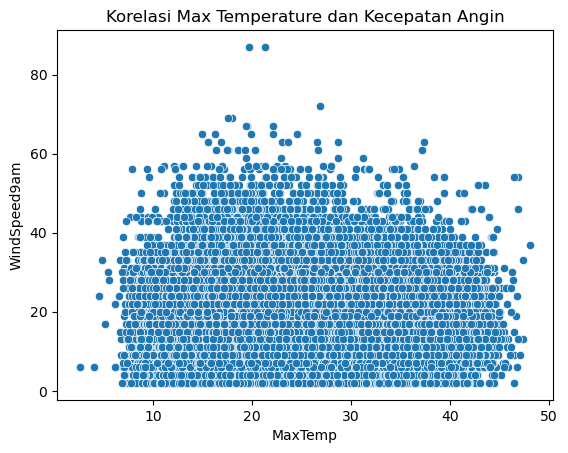

In [49]:
#Dilakukan analisis visual menggunakan grafik plot titik mengenai korelasi dua variabel yakni MaxTemp dan WindSpeed9am
#didefinisikan grafik dengan variabel x diinisialisasikan dengan MaxTemp
#variabel y diinisialisasikan dengan WindSpeed9am
sns.scatterplot(data=data_hujan, x='MaxTemp', y='WindSpeed9am')
#akan diberi judul pada grafik yakni Korelasi Max Temperature dan Kecepatan Angin
plt.title('Korelasi Max Temperature dan Kecepatan Angin')
#kemudian akan ditampilkan mengenai grafik visual mengenai korelasi kedua variabel tersebut
plt.show()

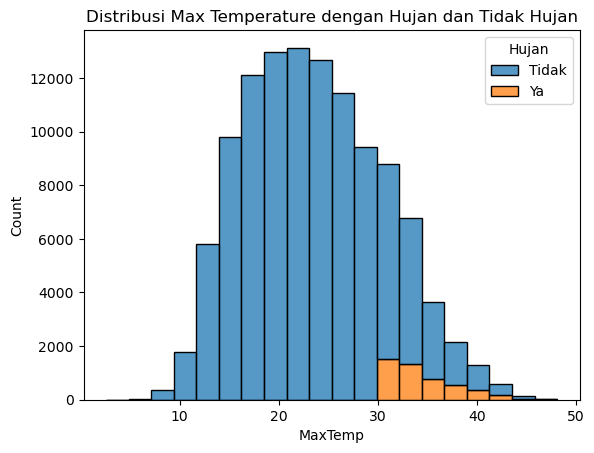

In [50]:
#Akan divisualisasikan mengenai distribusi Max Temperature dan Kecepatan Angin dengan Hujan dan Tidak Hujan
sns.histplot(data=data_hujan, x='MaxTemp', hue='Hujan', multiple='stack', bins=20)
#akan diberi judul untuk grafik yakni Distribusi Max Temperature dengan Hujan dan Tidak Hujan
plt.title('Distribusi Max Temperature dengan Hujan dan Tidak Hujan')
#selanjutnya akan ditampilkan mengenai grafik tersebut
plt.show()

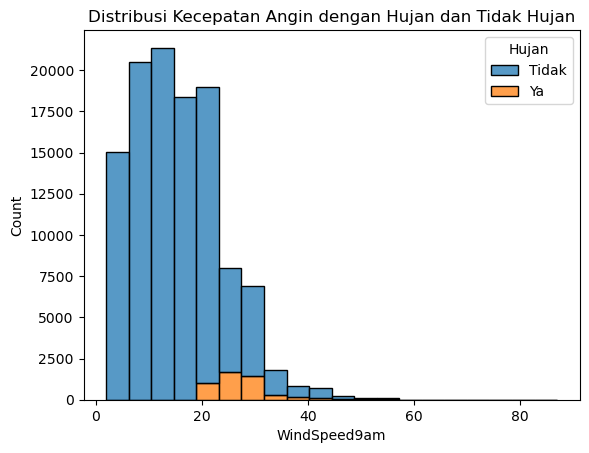

In [51]:
#akan divisualisasikan mengenai distribusi kecepatan angin dengan hujan dan tidak hujan
sns.histplot(data=data_hujan, x='WindSpeed9am', hue='Hujan', multiple='stack', bins=20)
#akan diberi judul untuk grafik yakni Distribusi Kecepatan Angin dengan Hujan dan Tidak Hujan
plt.title('Distribusi Kecepatan Angin dengan Hujan dan Tidak Hujan')
#selanjutnya akan ditampilkan mengenai grafik tersebut
plt.show()

In [ ]:
#Pada bagian ini akan ditampilkan mengenai program prediksi hujan dengan menggunakan data perulangan if else, serta metode input
def predict_rain(suhu, kecepatan_angin):
    # Menentukan apakah ada hujan berdasarkan Max Temperature dan Kecepatan Angin
    threshold_temp = 30  # Nilai ambang batas temperatur maksimum untuk menentukan ada hujan atau tidak
    threshold_wind = 20  # Nilai ambang batas kecepatan angin untuk menentukan ada hujan atau tidak

    if suhu > threshold_temp and kecepatan_angin > threshold_wind:
        return "Hujan"
    else:
        return "Tidak Hujan"

# Input suhu dan kecepatan angin dari pengguna
input_suhu = float(input("Masukkan suhu: "))
input_kecepatan_angin = float(input("Masukkan kecepatan angin: "))

# Memprediksi apakah hujan atau tidak berdasarkan suhu dan kecepatan angin yang diinput
hasil_prediksi = predict_rain(input_suhu, input_kecepatan_angin)
print("Prediksi: ", hasil_prediksi)

# Menghitung korelasi antara kolom "Max Temperature" dan "Temp 3 pm "

In [ ]:
#akan dibentuk diagram batang korelasi data hujan dengan indikator variabel sebagai berikut.
data_hujan['Hujan'] = ((data_hujan['MaxTemp'] > threshold_temp) & (data_hujan['Temp3pm'] > threshold_wind))
#selanjutnya dengan menggunakan logika matematika, akan dibentuk 2 diagram berbeda yakni bernilai true dan false
data_hujan['Hujan'] = data_hujan['Hujan'].map({True: 'Ya', False: 'Tidak'})

In [ ]:
#akan ditampilkan mengenai distribusi Max Temperature dan Kecepatan Angin dengan Hujan dan Tidak Hujan
sns.histplot(data=data_hujan, x='MaxTemp', hue='Hujan', multiple='stack', bins=20)

plt.title('Distribusi Max Temperature dengan Hujan dan Tidak Hujan')
plt.show()

In [ ]:
#distribusi kecepatan angin dengan hujan dan tidak hujan
sns.histplot(data=data_hujan, x='Temp3pm', hue='Hujan', multiple='stack', bins=20)
#akan diberi judul untuk grafik yakni Distribusi Temp 3 pm dengan Hujan dan Tidak Hujan
plt.title('Distribusi Temp 3 pm dengan Hujan dan Tidak Hujan')
#selanjutnya akan ditampilkan mengenai grafik berikut.
plt.show()

In [ ]:
def predict_rain(suhu, temp3pm) :
    # Menentukan apakah ada hujan berdasarkan Max Temperature dan Kecepatan Angin
    threshold_maxtemp = 30  # Nilai ambang batas temperatur maksimum untuk menentukan ada hujan atau tidak
    threshold_temp3pm = 30  # Nilai ambang batas kecepatan angin untuk menentukan ada hujan atau tidak

    if suhu > threshold_maxtemp and temp3pm > threshold_temp3pm:
        return "Hujan"
    else:
        return "Tidak Hujan"

# Input suhu dan kecepatan angin dari pengguna
input_maxtemp = float(input("Masukkan suhu maksimal : "))
input_temp3pm = float(input("Masukkan temperatur pukul 15.00 : "))

# Memprediksi apakah hujan atau tidak berdasarkan suhu dan kecepatan angin yang diinput
hasil_prediksi = predict_rain(input_maxtemp, input_temp3pm)
print("Prediksi: ", hasil_prediksi)

# Kesimpulan
Berdasarkan program yang telah kami buat, kami ingin menunjukkan bahwa suhu maksimum (MaxTemp) dengan temperatur pada pukul 15.00 (Temp3pm) menunjukkan adanya hubungan korelasi yang kuat. Jika salah satu variabel mengalami kenaikan nilai, maka variabel lainnya pun akan mengalami kenaikan nilai, sehingga apabila nilainya dimasukkan pada program di atas maka dapat diketahui bagaimana kemungkinan adanya hujan pada kasus tersebut.

Sekian dan Terima Kasih

## Ringkasan Informasi Data yang Sudah Diolah

In [ ]:
# awalnya kita drop kolom ini :'Date','Evaporation', 'Sunshine','Cloud9am','Cloud3pm'
# jadi kolom ini hilang

In [ ]:
# setelah itu langsung menggunakan fungsi drop.na untuk menghilangkan semua data kosong yaitu khususnya data kosong pada kolom sbb. : 
# MinTemp, MaxTemp, Rainfall, WindGustDir, WindGustSpeed, WindDir9am , WindDir3pm , WindSpeed9am, 
# WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm, RainToday, RainTomorrow

In [ ]:
 # yang dicari korelasinya :
    #1 : 'MaxTemp','MinTemp','RainToday_No', 'RainToday_Yes
    #2 : 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm','RainToday_No', 'RainToday_Yes'
    #3 : 'Humidity9am', 'Humidity3pm', 'RainToday_No', 'RainToday_Yes'
    #4 : 'Pressure9am', 'Pressure3pm', 'RainToday_No', 'RainToday_Yes'
    #5 : 'Temp9am', 'Temp3pm', 'RainToday_No', 'RainToday_Yes'
    #6 : 'MaxTemp', 'Temp3pm', 'RainToday_No', 'RainToday_Yes'
    #7 : 'MaxTemp', 'Temp3pm', 'Humidity9am', 'Humidity3pm' , 'RainToday_No', 'RainToday_Yes'

In [ ]:
# berdasarkan analisis data menggunakan korelasi dan regresi logistik didapat bahwa :
# humidity9am, humidity3pm, maxtemp, dan temp3pm menjadi faktor yang utama terjadinya rain today

 # Mengisi Data yang Kosong

In [ ]:
#karena data yang dicari korelasinya banyak yang kosong, kita mencoba untuk mengisi data yang kosong tersebut yaitu dengan
# 1. mean
# 2. median
# 3. interpolasi
# 4. regresi

## 1. Mean